# The Causal Inference "do" Operator Fully Explained with an End-to-End, Real World Example using Python and DoWhy

## How to master the causal inference do operator and why you need it in your data science toolbag

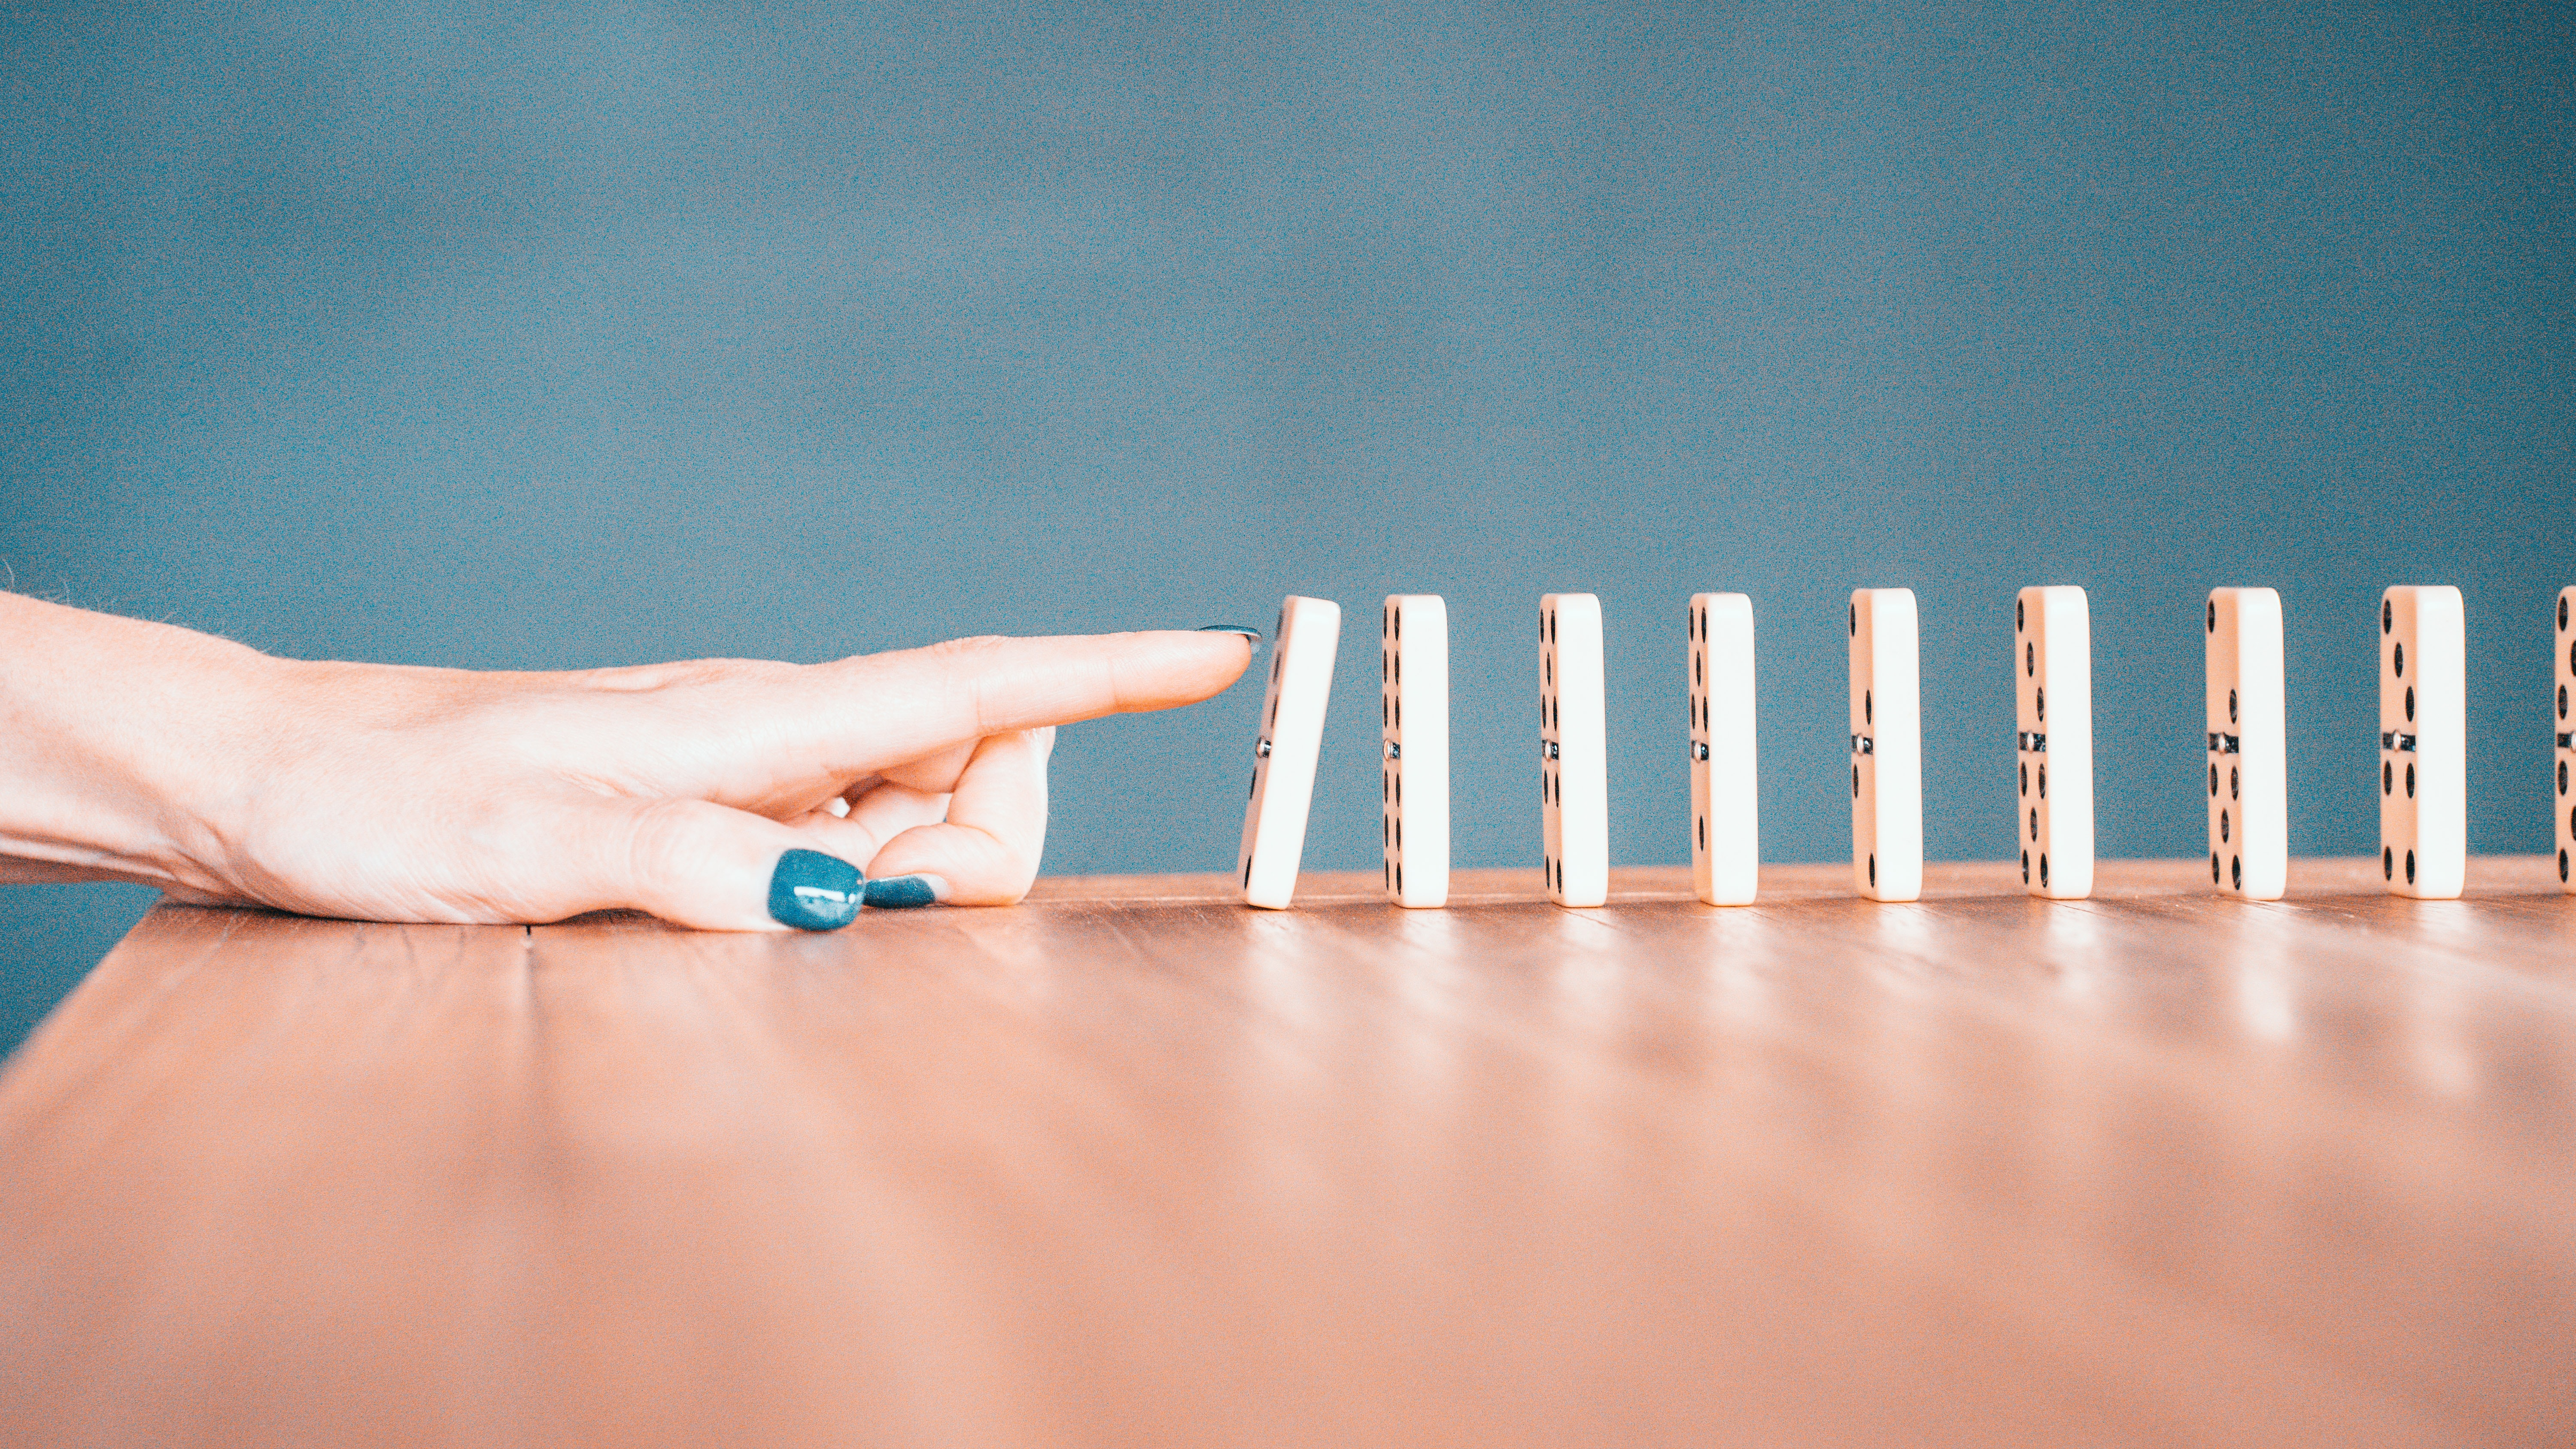
Photo by <a href="https://unsplash.com/@bradyn?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Bradyn Trollip</a> on <a href="https://unsplash.com/s/photos/domino?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

## Introduction
Fully explained, end-to-end examples of causal inference that have actual, working source code are very hard to find on the Internet or in books as I have discovered in my journey to understand how this emerging technology works and why it is so important.

But if you persevere it is certainly well worth the effort as it will be able to solve a different type of problem that does not have a solution using any other techniques.

Traditional machine learning models can predict what is likely to happen if the future broadly turns out like the past but they cannot tell you what you do differently to change the outcomes.

For example a classification algorithm can predict if bank loan customers are likely to default but it cannot answer questions like "If we change the repayment term of the loan, will more customers avoid defaulting?".

Here are a few more examples of the types of questions causal inference can answer that traditional predictive models cannot -

- Does a proposed change to a system improve people’s outcomes?
- What led to a change in a system’s outcome?
- What changes to a system are likely to improve outcomes for people?

There are many examples of online articles that go through the detail of the mathematics involved in causal inference, but very few that provide a simple, worked example with a full explanation and all of the source code.

If you stick with me and read through to the end of this article I promise to equip you with afull explanation and all of the source code that will enable you to do something truly amazing that is just not possible with other machine learning techniques.

## The LaLonde Dataset
The first thing we need are some data. I am going to use the famous LaLonde dataset that was created by observing the impact of an employment skills training programme on earnings in the 1970's. The full citation and reference details can be found in the References section at the end of the article.

In [1]:
import pandas as pd
import numpy as np

df_lalonde=pd.read_csv("data/lalonde.csv").iloc[:, [1, 2, 3, 4, 5, 6, 7, 10]]
df_lalonde.rename(columns={"hispan": "hisp", "nodegree": "nodegr"}, inplace=True)

features : list = list(df_lalonde.columns)

# This is just to demonstrate that the dowhy do operator can cope with categorical data types
df_lalonde["black"] = np.where(df_lalonde["black"] == 1, "yes", "no") 
    
top_earner_percentile : int = 75
top_earner_boundary : float = np.percentile(df_lalonde["re78"], top_earner_percentile)

df_lalonde["topearner"] = np.where(df_lalonde["re78"] > top_earner_boundary, 1, 0)
df_lalonde["age group"] = pd.cut(df_lalonde["age"], bins=[0, 25, 30, 40, 50, 60])

df_lalonde

treat  age  educ black  hisp  married  nodegr        re78  topearner  \
0        1   37    11   yes     0        1       1   9930.0460          0   
1        1   22     9    no     1        0       1   3595.8940          0   
2        1   30    12   yes     0        0       0  24909.4500          1   
3        1   27    11   yes     0        0       1   7506.1460          0   
4        1   33     8   yes     0        0       1    289.7899          0   
..     ...  ...   ...   ...   ...      ...     ...         ...        ...   
609      0   18    11    no     0        0       1  10150.5000          0   
610      0   24     1    no     1        1       1  19464.6100          1   
611      0   21    18    no     0        0       0      0.0000          0   
612      0   32     5   yes     0        1       1    187.6713          0   
613      0   16     9    no     0        0       1   1495.4590          0   

    age group  
0    (30, 40]  
1     (0, 25]  
2    (25, 30]  
3    (25, 30]  
4    (30, 40]  
..        ...  
609   (0, 25]  
610   (0, 25]  
611   (0, 25]  
612  (30, 40]  
613   (0, 25]  

[614 rows x 10 columns]

It is worth taking a moment to understand the key aspects of the dataset - 

- The "treat" column contains a 1 of the individual participated in the training and a 0 if they did not.
- "re78" is the relative earnings of the individual in 1978 which was at the end of the observation period.
- "educ" represents the years of education that the individual has had.
- The other features represent yes / no attributes of the individual e.g. "nodegr" = 1 represents the individual not having a college degree.
- I have feature engineered "topearner" to hold a 1 if the earnings are in the top quartile and "age group" to categorise the participant age into bins.

A full explanation the dataset features can be found here - https://rdrr.io/cran/designmatch/man/lalonde.html.

## What Impact Did The Training Programme Have?
Now let's take a look at the data to see what impact the training programme had on the participants' earnings ..

In [2]:
treat_filter = df_lalonde["treat"] == 1

impact_of_training = df_lalonde[treat_filter]["re78"].mean() - df_lalonde[~treat_filter]["re78"].mean()

top_earner_treatment = df_lalonde[treat_filter]["topearner"].value_counts(normalize=True)
top_earner_no_treatment = df_lalonde[~treat_filter]["topearner"].value_counts(normalize=True)

p_top_earner_treatment = top_earner_treatment[1]
p_top_earner_no_treatment = top_earner_no_treatment[1]

print(f"The average impact of participation in the job training program on earnings is ${impact_of_training:+0,.2f}\n")
print(f"P(top earner=1 | treatment=1) = {p_top_earner_treatment}")
print(f"P(top earner=1 | treatment=0) = {p_top_earner_no_treatment}")

display(df_lalonde.groupby("treat")["re78"].agg(["median","mean"]))

The average impact of participation in the job training program on earnings is $-635.03

P(top earner=1 | treatment=1) = 0.1945945945945946
P(top earner=1 | treatment=0) = 0.27505827505827507


median         mean
treat                       
0      4975.505  6984.169742
1      4232.309  6349.143530

And the results are in! 

- The apparent impact of attending the training programme is a decrease in annual earnings of \\$635. 
- The probability of being a top earner is 0.19 for those attending the training and 0.28 for those not attending.
- The median earnings for those who received the training is \\$4,232 and \\$4,976 for those who were not trained.
- The mean earnings for those who received the training is \\$6,349 and \\$6,984 for those who were not trained.

## What Advice Would You Give?
Based on the analysis the clear advice would be to stop the training programme as it can be shown using four different measures that the impact on earnings is consistently negative.

Intuitively this conclusion does not seem right though. Even if the training was absolutely terrible it does not feel right that attending the training would make a participant less employable and damage their future earnings.

## So What Went Wrong with the Analysis?
At this point the potential for traditional approaches including probabilities and predictive models cannot get us any further. Any application of these techniques will conclude that the training should be cancelled.

In order to break through those limitations and to really understand what is going on we need to use causal inference techniques to build a causal model and to apply the "do" operator.

If you want to know the true impact of the training programme and why using traditional probabilities and predictive models can cause erroneous and even dangerous outcomes, please read on ...

## A Causal Inference Solution Using The "do" Operator
Let's start the journey to a more accurate evaluation by taking a more detailed look at some of the features in the dataset ...

In [3]:
import matplotlib.pyplot as plt

def plot_comparison(feature : str, normalize : bool = True):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    df_lalonde[~treat_filter][feature].value_counts(normalize=normalize).sort_index().plot(ax=axes[0], kind="bar", title="No Training", xlabel=feature, ylim=(0,1) if normalize else False)
    df_lalonde[treat_filter][feature].value_counts(normalize=normalize).sort_index().plot(ax=axes[1], kind="bar", title="Received Training", xlabel=feature, ylim=(0,1) if normalize else False)

    plt.show()

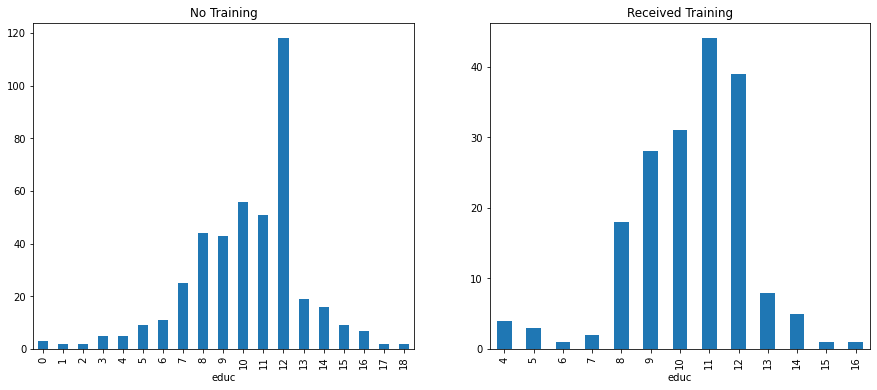

In [4]:
plot_comparison("educ", normalize=False)

Clearly there is a significantly different pattern in education between those that attended the training and those that did not. At this point in a real world project we would be working with domain experts to understand these patterns but even without domain expertise it is reasonable to conclude that education may have a causal effect on both who attends the training and  their ability to earn.

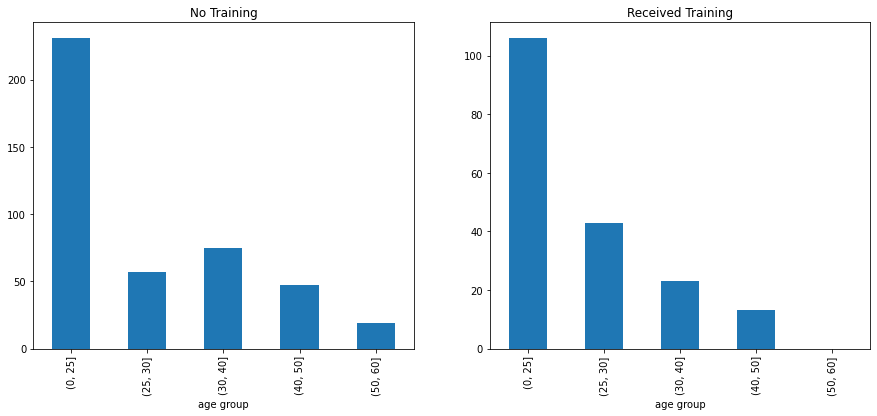

In [5]:
plot_comparison("age group", normalize=False)

It is a similar story for age. For those receiving training it is a linear pattern with more younger people and less older people. For no training there is a spike in the 30-40 age group. One hypothesis might be that many 30-40 year olds are already earning well and do not want any job-skills related training.

Again this would suggest that age is affecting both whether an individual is likely to attend the training and their earnings potential.

## Causal Inference and "Confounding"
This simple additional analysis has revealed the presence of "confounders". This term is bandied around in many of the available examples, often with the accompanying calculus and formulas, but usually with no clear explanation.

Stated simply the impact of features like age and education is mixed in with the main effect of interest i.e. of training on earnings and when we apply traditional approaches that standalone effect cannot be spearated out.

## Building a "Directed Acyclic Graph" (DAG)
It is not possible to discover causality in data on its own. The data needs to be supplemented with a "Directed Acyclic Graph" (DAG) that is constructed by "discovering" the causal relationships by utilizing domain expertise and other techniques.

For a more detailed exploration please take a look at my article on discovering causal relationships - https://towardsdatascience.com/causal-discovery-does-the-cockerel-crowing-cause-the-sun-to-rise-f4308453ecfa

The next step is going to use my ``DirectedAcyclicGraph`` class. I have left the source code out of the article to keep it more concise but here is the link to the full source code in case you would like to run the code yourself - https://gist.github.com/grahamharrison68/9733b0cd4db8e3e049d5be7fc17b7602.

If you do decide to use it and if you like it why not optionally consider buying me a coffee? ...

Here is my proposal for the causal relationships in the LaLonde data -

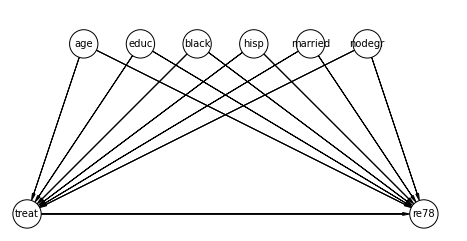

In [6]:
from dag_tools import DirectedAcyclicGraph

lalonde_model_edges : list = [("age", "treat"), ("age", "re78"),
                               ("educ", "treat"), ("educ", "re78"),
                               ("black", "treat"), ("black", "re78"),
                               ("hisp", "treat"), ("hisp", "re78"),
                               ("married", "treat"), ("married", "re78"),
                               ("nodegr", "treat"), ("nodegr", "re78"),
                               ("treat", "re78")]
    
lalonde_model_pos : dict = {"treat": [1,1], "age": [2, 4], "educ": [3, 4], "black": [4, 4], "hisp": [5, 4], "married": [6,4], "nodegr": [7, 4], "re78": [8, 1]}
    
lalonde_model = DirectedAcyclicGraph(edges=lalonde_model_edges)    
lalonde_model.display_pgm_model(pos=lalonde_model_pos)

The DAG can be interpreted as follows -

- "treat" (i.e. attending the training programme) has a causal impact on "re78" (i.e. future earnings).
- All the other features have a causal effect on whether an individual is likely to join the training programme or not.
- All the other features also have a causal effect on future earnings.

For example an individuals age is "causing" them to attend the training or not, maybe by more young people wanting to be trained and age is also "causing" earnings, possibly because older peolple with more experience can earn more.

This pattern is quite common. When statisticians are carrying out a Randomized Control Trial (RCT) they may condition or control for the variables that are mixing with the main effect.

This means that for age they could split the observations up into the age groups, look at the relationship between treat and age for each group and then take a proportional average of each group to estimate the true overall effect.

However, there are some problems with this approach. For example, how do you define the boundaries for the groups? What if the key impact was 16-18 year olds but the boundary had been set up as 16-30? And what if there were no observations for 40-45 year olds?

Another approach is not to observe, but to intervene. We could simply force everyone to do the training and then we would see the true impact. But what if the observations were historical (as in the LaLonde data) and it was too late to intervene? Or what if this was a study of smoking or obesity? The subjects could not be forced to smoke or forced to become obese just to prove our theories!

This is where the "do" operator comes in. It sounds like magic but it is genuinely possible to build a causal inference model that can accurately simulate these interventions without having to do them in the real world. This will save significant time and money, remove the need for randomised control trials that condition for large numbers of variables and enable studies of factors that would have moral and ethical concerns in real-world studies like smoking and obesity.

## The Magic of the "Do" Operator
Let's imagine that rather than observing a group of people, some of whom did the training and some of whom did not, we can travel back in time, intervene instead of observing, and make them all do the training. 

In that instance the DAG would look like this -

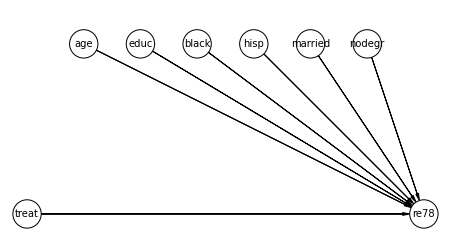

In [7]:
do_model_edges : list = [("age", "re78"),
                         ("educ", "re78"),
                         ("black", "re78"),
                         ("hisp", "re78"),
                         ("married", "re78"),
                         ("nodegr", "re78"),
                         ("treat", "re78")]
    
do_model_pos : dict = {"treat": [1,1], "age": [2, 4], "educ": [3, 4], "black": [4, 4], "hisp": [5, 4], "married": [6 ,4], "nodegr": [7, 4], "re78": [8, 1]}
    
do_model = DirectedAcyclicGraph(edges=do_model_edges)    
do_model.display_pgm_model(pos=do_model_pos)

This is effectively what the magic "do" operator is doing. If you intervene and $do(treat = 1)$ you are effectively "rubbing out" all the input lines of causality because no matter how age, education and other features affect the probability of doing the training it is always going to happen.

Behind the scenes the ``DoWhy`` library is simulating this intervention. It can do this be using the rules of do calculus to convert $p(re78 | do(treat=1))$ which cannot be directly calculated unless we do a physical intervention into a set of observational rules that can be calculated from the data.

I have deliberately left the details of the maths out of this article. There are plenty of articles that show the maths but very few that show a working example with the Python code, hence that is the focus if this article.

Note: you will need my ``DirectedAcyclicGraph`` class if you want to run the code so if you haven't downloaded it already head over to  https://gist.github.com/grahamharrison68/9733b0cd4db8e3e049d5be7fc17b7602 and don't forget to consider buying me a coffee if you like it!

Here is the fully working source code to perform the "do" operator on the LaLonde data ...

In [8]:
import dowhy.api

np.random.seed(42) 

variable_types : dict = {"treat": "d", "age": "c", "educ": "c", "black": "d", "hisp": "d", "married": "d", "nodegr": "d", "re78": "c", "topearner": "d", "age group": "d"}
    
df_do_lalonde = df_lalonde.causal.do(x={"treat": 1},
                                     outcome="re78",
                                     dot_graph=lalonde_model.gml_graph, 
                                     variable_types=variable_types,
                                     proceed_when_unidentifiable=True)

display(df_do_lalonde.groupby("treat")["re78"].agg(["median","mean"]))
display(df_do_lalonde)

median         mean
treat                       
1      5149.501  7115.397401

treat  age  educ black  hisp  married  nodegr       re78  topearner  \
0        1   25    11    no     0        0       1  18783.350          1   
1        1   22    12    no     0        0       0  12590.710          1   
2        1   23     8    no     0        1       1   4232.309          0   
3        1   29    14   yes     0        0       0  17814.980          1   
4        1   27    10    no     1        0       1  11142.870          1   
..     ...  ...   ...   ...   ...      ...     ...        ...        ...   
609      1   17     9   yes     0        0       1   5445.200          0   
610      1   33    12    no     0        1       0  12418.070          1   
611      1   19    11   yes     0        0       1   4146.603          0   
612      1   27    13    no     0        1       0      0.000          0   
613      1   21    13   yes     0        0       0  17094.640          1   

    age group  propensity_score     weight  
0     (0, 25]          0.140217   7.131783  
1     (0, 25]          0.082278  12.153856  
2     (0, 25]          0.042348  23.613811  
3    (25, 30]          0.686502   1.456660  
4    (25, 30]          0.228029   4.385412  
..        ...               ...        ...  
609   (0, 25]          0.674475   1.482635  
610  (30, 40]          0.038692  25.845370  
611   (0, 25]          0.733292   1.363714  
612  (25, 30]          0.042002  23.808186  
613   (0, 25]          0.642556   1.556285  

[614 rows x 12 columns]

## What Does the Code Mean?
Before we get into the truly amazing results it would be useful to walk through the code line-by-line.

Firstly, importing ``dowhy.api`` magically extends pandas dataframes so that the gain a new ``causal.do`` method. 

Next setting the random seed in numpy ensures that the ``do`` method is reproducable and the same results will be produced on every run. The ``DoWhy`` documentation does not mention anything about setting a random seed and this was found by pure trial-and-error. Also to note, the random seed needs to be set in the preceeding statement before every call to ``causal.do``, not just before the first one.

The next mystery of ``causal.do`` is the ``variable_types`` parameter. The ``DoWhy`` documentation is incomplete and inconsistent. Trying out lots of different things has led to the following conclusions -

- Despite what the documentation says there are only 2 types that are important are "d" for discrete and "c" for continuous.
- In statistics an integer is discrete but ``DoWhy`` produces some very odd results if integers are declared as "d". Based on pouring over the ``DoWhy`` documentation examples my conclusion is that integers need to be declared as type "c" for continuous.
- Inside the ``DoWhy`` source code there is a method called ``infer_variable_types`` but it is stubbed out with no implementation so I have written my own implementation which is available as a static method in ``DirectedAcyclicGraph.infer_variable_types()``.

Here is what the all-important ``causal.do`` method parameters mean -

- ``x={"treat": 1}`` is saying what it is we want to "do". In this case we want to see what happens if everyone were forced to take the training which is represented in the data by ``treat=1``.
- ``outcome="re78"`` - this is the outcome or effect we are looking for. What is the effect of "doing" treat=1 on the individuals salary (the relative earnings in 1978).
- ``dot_graph=lalonde_model.gml_graph`` is informing the ``do`` operator of the causal relationships we believe exist in the data. ``lalonde_model`` is an instance of my ``DirectedAcyclicGraph`` class and I have given it a property which spits out the structure in gml format -
    - The ``do`` method requires either ``common_causes`` or ``dot_graph`` to be passed in to describe the causal relationships.
    - The ``dot_graph`` parameter will accept a structure in either ``dot`` or ``gml`` format but this is not mentioned anywhere in the documentation; gml is much better in my opinion as it is used everywhere else in ``DoWhy``.
    - Specifying a graph is much better than setting ``common_causes`` as a graph can capture any type of structure whereas ``common_causes`` is much more limiting. Again this is not mentioned anywhere in the ``DoWhy`` documentation.
- The ``variable_types`` parameter has already been explained.
- ``proceed_when_unidentifiable=True`` avoids an annoying user prompt that interrupts the calculation.

## How Does it Work?
The ``causal.do`` method is returning a new dataframe that effectively simulates a forced intervention and provides the data that would have been collected had everyone done the training -

In [9]:
df_do_lalonde["treat"].value_counts()

1    614
Name: treat, dtype: int64

``DoWhy`` is different to most of the other Python causal libraries in this respect as most of the other libraries just to return  a number and not a dataset. 

Returning a ``DataFrame`` is initially a bit confusing but dig a little deeper and it is a powerful, flexible and informative approach.

Without knowing the details of the internal implementation my conclusion is that ``DoWhy`` is simulating a Randomized Control Trial by sampling the data based on the groups that need to be used to "de-confound" the mixing effect described earlier in the article.

For example, take a look at a comparison of the following feature across the original observed data and the new intervention data -

In [10]:
def plot_do_comparison(feature : str, normalize : bool = True):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    df_lalonde[treat_filter][feature].value_counts(normalize=normalize).sort_index().plot(ax=axes[0], kind="bar", title="Received Training - Observation", xlabel=feature, ylim=(0,1) if normalize else False)
    df_do_lalonde[feature].value_counts(normalize=normalize).sort_index().plot(ax=axes[1], kind="bar", title="Received Training - Intervention", xlabel=feature, ylim=(0,1) if normalize else False)

    plt.show()

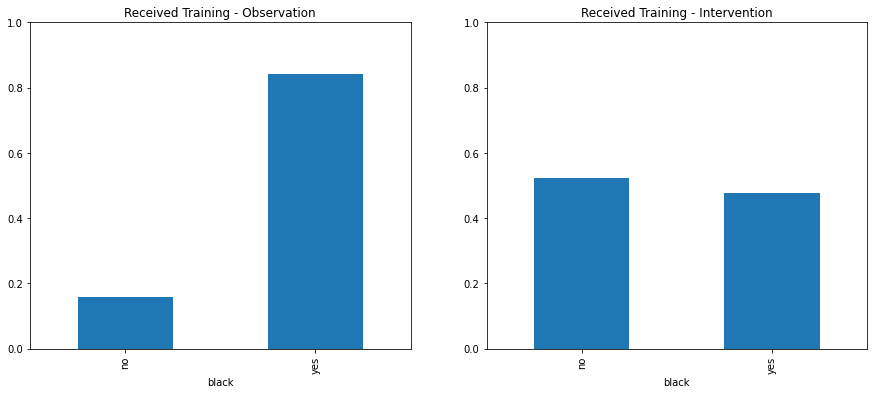

In [11]:
plot_do_comparison("black", normalize=True)

Clearly ``DoWhy`` has resampled the intervention data for this feature in a very different way. 

## What is the True, "Deconfounded" Impact of the Training on Earnings?
Now all that remains is to interpret the true impact of the training on earnings by taking a look inside the ``do`` dataframe -

In [12]:
print("Median and mean earnings of those receiving training from the interventional data")
display(df_do_lalonde.groupby("treat")["re78"].agg(["median","mean"]))

print("Median and mean earnings of those receiving training from the original observational data")
display(df_lalonde[treat_filter].groupby("treat")["re78"].agg(["median","mean"]))

Median and mean earnings of those receiving training from the interventional data


median         mean
treat                       
1      5149.501  7115.397401

Median and mean earnings of those receiving training from the original observational data


median        mean
treat                      
1      4232.309  6349.14353

## Conclusion
The traditional approach of using probabilities on observational data suggested that those attending the training would actually have a lower salary than if they had not been trained. 

The mean salary of those trained from the observational data is \\$6,349 whilst the causal inference "do" approach to simulating an intervention revealed the true impact - a salary increase and a mean salary of \\$7,115.

Instead of cancelling the training programme the advice after applying causal inference approaches would be to expand the training programme because it is providing more equitable opportunities for groups that need help to increase their long-term relative earnings.

I promised something amazing by the end of the article and if this result has the same revelationary impact on you as it did for me then I hope it has lived up to that promise.

Whenever there are causal effects at work in data traditional, predictive approaches can lead to the wrong conclusions and recommendations and this makes causal inference an essential tool for all data scientists to have in their toolbag. 

## References

LaLonde dataset -
- Citation: LaLonde, Robert J, 1986. "Evaluating the Econometric Evaluations of Training Programs with Experimental Data," American Economic Review, American Economic Association, vol. 76(4), pages 604-620, September.
- Source (including license details): https://users.nber.org/~rdehejia/nswdata2.html
- Explanation: https://rdrr.io/cran/designmatch/man/lalonde.html